<div style="text-align:center"><span style="color:green; font-family:Arial; font-size:2em;">Vashisth Tiwari</span></div>

<div style="text-align:center"><span style="color:red; font-family:Arial; font-size:1.8em;"> Physics 403</span></div>

* The HW was discussed with Navya Uberoi, Tahamid Siam, and Jacob Zweifel

In [2]:
import numpy as np
import scipy as sp
from math import sqrt, pi, exp
import pandas as pd
#
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import random

##
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-dark')
#plt.rcParams["figure.figsize"] = (5,5)

import statistics
from IPython.display import display, Math
from tabulate import tabulate

In [3]:
def scatter_plot(x,y,xyname = None, xlabel = None, ylabel=None,title=None, a=1):
    plt.plot(x,y,'-', label =xyname, alpha=a)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

# General Derivation

Know:

$$ p(d| v_m) \propto p(v_m|d)\:p(d) $$
$$ \therefore\: p(d| v_m) \propto p(v_m|d)\:p(d) $$
Thus,
$$ p(d| v_m) \propto \int_{H_0} p(v_m| H_0,d)\:p(H_0)\:p(d)\:dH_0$$

Since $v_m$ is disrubited in a guassian

$$p(v_m|d, H_0) = \frac{1}{\sqrt{2\pi}\sigma} \exp{\left(- \frac{(v_m - H_0 d)^2}{2\sigma^2}\right)}$$

Since $d$ is disrubited in a uniformly

$$ p(d) = \frac{1}{\Delta d} = \frac{1}{800}$$

___

For part (a) $H_0$ is define as one value. Thus it acts like a delta function peaking at the given value of $H_0$ which is 77 in this case

$$p(H_0) = p(\delta(H_0,75))=1$$

## 1(a)

In [4]:
# takes in given sigma, v_m, H, and one value of d to return p(vm|d,H)
def gaussboi(sigma, v, H, d):
    t1 = 1/(sqrt(2*pi)*sigma)
    t2 = exp((-(v-(H*d))**2)/(2*(sigma**2)))
    p_v_dH = t1 * t2 
    return p_v_dH


# takes in given sigma, v_m, H, and a list of d to return p(vm|d,H)
def gaussplot(dlist):
    unif_d = 1/800
    y = []
    for d in dlist:
        p_v_dH = gaussboi(sigma, v, H, d)
        p_v_dm = p_v_dH * unif_d
        y.append(p_v_dm)
    return y

In [5]:
sigma = 10**(3) # Given value of sigma, v = v_m
v = 30*10**(3)
dlist = np.linspace(0,800,1001) # creates d linearly spaced 1001 points from 0 to 800

In [6]:
# Given value of H 
H = 75

In [7]:
y = gaussplot(dlist)
len(y)

1001

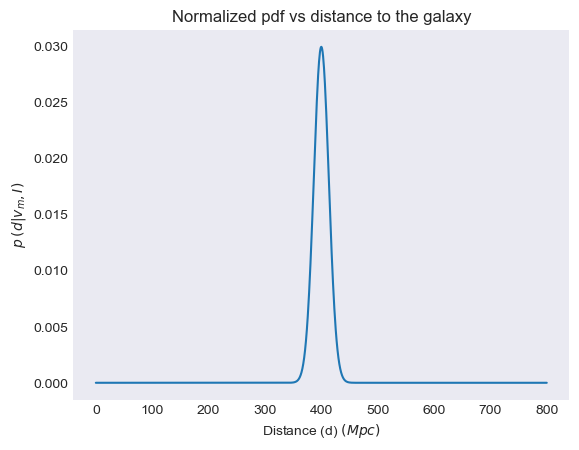

In [8]:
n = np.trapz(y, dlist)
#Normalising pdf meaning area should integrate to 1
normalizeda = y/ n
scatter_plot(dlist,normalizeda, xlabel = r"Distance (d) $(Mpc)$", ylabel=r"$p\:(d|v_m, I)$", 
             title ="Normalized pdf vs distance to the galaxy")

## 1(b)

In [9]:
def most_p(dlist,normalizedc): 
    intgral_n = normalizedc

    for i in range (0,len(intgral_n)):
        maxx = max(intgral_n)
        if intgral_n[i] == maxx:
            x = i
        else:
            continue
    mean = dlist[x]
    print("Best estimate (dhat) in Mpc: ", mean)
    print("Index: ", x)
    print("___________________\n")


def left_l(dlist,normalizedc):
    intgral_n = normalizedc
    # left side of central 68
        # from -inf to this point the area should be 16
    i = 1
    area = 0
    while (area<(0.16)):
        xlist, ylist = dlist[:i], intgral_n[:i]
        area = np.trapz(ylist, xlist)
        i +=1
    left = dlist[i]
    print("Left limit of Central 68 (in Mpc):", left)
    print("Index: ", i)
    print("___________________\n")


def right_l(dlist,normalizedc):
    intgral_n = normalizedc
    # right side of central 68
            # from this point to +inf the area should be 16
            # In other words, 84 from the left
    i = 1
    area = 0
    while (area<(1-0.16)):
        xlist, ylist = dlist[:i], intgral_n[:i]
        area = np.trapz(ylist, xlist)
        i +=1
    right = dlist[i]
    print("Right limit of Central 68 (in Mpc)", right)
    print("Index: ", i)
    print("___________________\n")

In [10]:
most_p(dlist,normalizeda)
left_l(dlist,normalizeda)
right_l(dlist,normalizeda)

Best estimate (dhat) in Mpc:  400.0
Index:  500
___________________

Left limit of Central 68 (in Mpc): 388.8
Index:  486
___________________

Right limit of Central 68 (in Mpc) 415.20000000000005
Index:  519
___________________



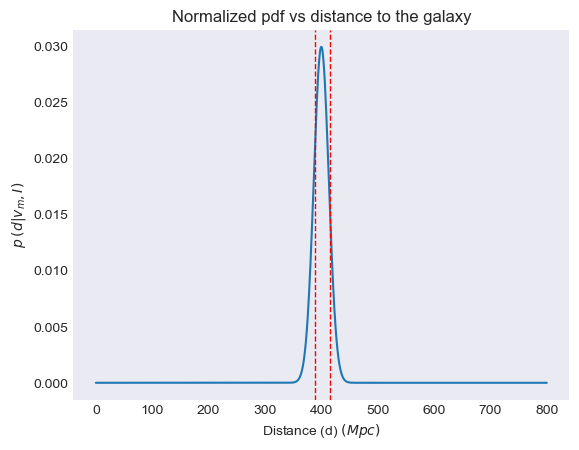

In [11]:
# Plotting with left and right central limits
plt.plot(dlist, normalizeda)

plt.axvline(dlist[486], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='red') # red for l and r limits
plt.axvline(dlist[519], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='red')

plt.xlabel(r"Distance (d) $(Mpc)$")
plt.ylabel(r"$p\:(d|v_m, I)$")
plt.title("Normalized pdf vs distance to the galaxy")
plt.show()

## 1(c)

In [12]:
Hlist = np.random.uniform(50,90, size=1001) #Uniformly Distrubuted H
Hlist= np.sort(Hlist) # sorts from less to more

In [13]:
sigma = 10**(3)
v = 30*10**(3)
dlist = np.linspace(0,800,1001)
dlist = np.sort(dlist)

Since $H$ is disrubited in a uniformly

$$ p(H) = \frac{1}{\Delta H} = \frac{1}{90-50} = \frac{1}{40}$$

In [15]:
def integralc(Hlist, dlist):
    int_list = []
    for d in dlist:
        y = []
        for H in Hlist:
            p_v_dH = gaussboi(sigma, v, H, d)
            p_d = 1/800
            p_h = 1/40 
            p_v_dm = p_v_dH * p_d *  p_h
            y.append(p_v_dm)
        integral = np.trapz(y, Hlist)
        int_list.append(integral)
    return int_list

In [16]:
intgral = integralc(Hlist, dlist)
x = np.trapz(intgral, dlist)
normalizedc = intgral/x

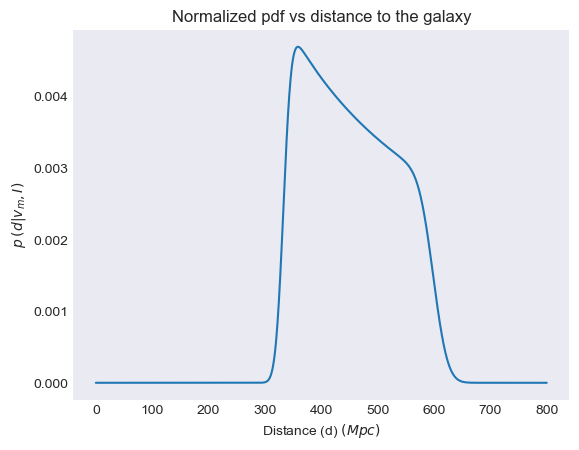

In [17]:
scatter_plot(dlist, normalizedc,xlabel = r"Distance (d) $(Mpc)$", ylabel=r"$p\:(d|v_m, I)$", 
             title ="Normalized pdf vs distance to the galaxy")

In [18]:
most_p(dlist,normalizedc)
left_l(dlist,normalizedc)
right_l(dlist,normalizedc)

Best estimate (dhat) in Mpc:  358.40000000000003
Index:  448
___________________

Left limit of Central 68 (in Mpc): 368.0
Index:  460
___________________

Right limit of Central 68 (in Mpc) 548.0
Index:  685
___________________



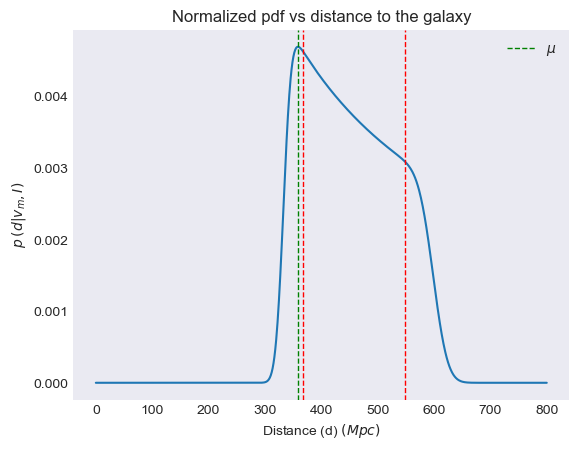

In [20]:
# Plotting with left and right central limits
plt.plot(dlist, normalizedc)
plt.axvline(dlist[449], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='green', label = r"$\mu$") # Green for mean

plt.axvline(dlist[460], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='red') # red for left and right limits
plt.axvline(dlist[685], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='red')
plt.legend()
plt.xlabel(r"Distance (d) $(Mpc)$")
plt.ylabel(r"$p\:(d|v_m, I)$")
plt.title("Normalized pdf vs distance to the galaxy")
plt.show()

- We note that here the central 68% does not include the most probable value itself as is apparent from the plot above

### 1(e)

For jefferies prior

$$ p(\tau | I) = \frac{1}{\tau\:ln{(\tau_{max}/\tau_{min})}}$$

In [21]:
# Define a function that takes in a list and returns jefferie's pror 

def jeffboi(Hlist):
    pjeff = []
    hmax = max(Hlist)
    hmin = min(Hlist)
    for h in Hlist:
        ph = 1/(h*np.log(hmax/hmin))
        pjeff.append(ph)
    Hlists = np.sort(Hlist)
    pjeffs = np.sort(pjeff)
    x = np.trapz(Hlists,pjeffs)
    pjeffn = pjeffs/x
    return pjeff

In [27]:
Hlistj1 = np.random.uniform(50,90, size=1001) # Uniform list of H
# for i in range(1002):
#     x = random.choice(Hlistj1)
#     Hl2.append(x)
jeff = jeffboi(Hlistj1) # converts to Jeff probability

"""Now we sample these values following the pdf given by jefferie's prior"""
x = np.random.choice(Hlistj1, size=1001, p = jeff/sum(jeff))
# plt.hist(x, density=True)
# plt.show()

### Linearly spaced $H_0$

In [28]:
Hlistj1 = np.linspace(50,90,1001)
dlistjeff = np.linspace(0,800,1001)
jeff = jeffboi(Hlistj1)
area = np.trapz(jeff, Hlistj1)
prob = jeff/area
x = np.random.choice(Hlistj1, size=1001, p = prob/sum(prob))
# plt.hist(x, density=True)
# plt.plot(Hlistj1, prob)
# plt.show()

In [29]:
def integral_e(Hlist, dlist):
    Hlist = np.sort(Hlist)
    dlist = np.sort(dlist) # need to short otherwise area goes back to negative
    int_list = []
    maxx = max(Hlist)
    minn = min(Hlist)
    for d in dlist:
        y = []
        for H in Hlist:
            p_v_dH = gaussboi(sigma, v, H, d)
            unif_d = 1/800
            jeffery_h = 1/(H*np.log(maxx/minn)) # p(H)
            p_v_dm = p_v_dH * unif_d *  jeffery_h 
            y.append(p_v_dm)
        integral = np.trapz(y, Hlist)
        int_list.append(integral)
    return int_list

In [30]:
intgral = integral_e(x, dlistjeff)

In [31]:
# Normalising the pdf
a = np.trapz(intgral, dlist)
intgral_n = intgral/a

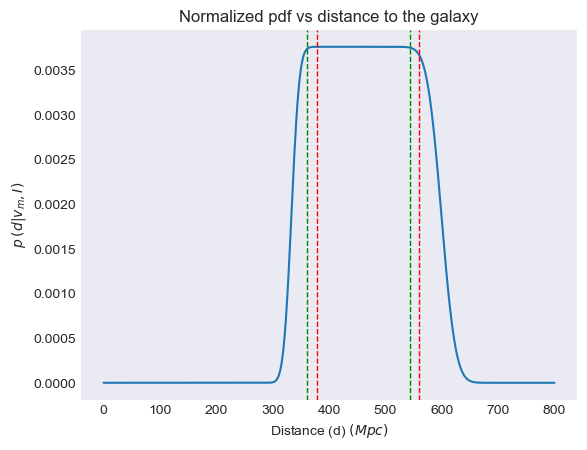

In [32]:
# Plotting the normalized pdf 
plt.plot(dlist, intgral_n)
plt.axvline(dlist[452], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='green')
plt.axvline(dlist[679], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='green') 

plt.axvline(dlist[473], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='red') 
plt.axvline(dlist[699], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='red') 

plt.xlabel(r"Distance (d) $(Mpc)$")
plt.ylabel(r"$p\:(d|v_m, I)$")
plt.title("Normalized pdf vs distance to the galaxy")
plt.show()


In [33]:
most_p(dlist,intgral_n)
left_l(dlist,intgral_n)
right_l(dlist,intgral_n)

Best estimate (dhat) in Mpc:  417.6
Index:  522
___________________

Left limit of Central 68 (in Mpc): 377.6
Index:  472
___________________

Right limit of Central 68 (in Mpc) 559.2
Index:  699
___________________



In [34]:
dlist[452],dlist[679]

(361.6, 543.2)

- Note here that the mean we get from our mean functions gives one value (due to float point error).
- On the other hand, we see that from the plot the most probable value is for a range and not one value
- Thus, we will say that the range of most probable values is not one value 

$$\hat{d} \in \left[361.6, 543.2\right]$$

- Also notice that the central area does not contain all of most probable value similar to the last question

### 1(g)

$$ p(H_0) = \frac{1}{\sqrt{2\pi} \sigma}\: \exp{ \left( -\frac{(H_{\mu}-H_0)^2}{2\sigma^2}\right)} $$

In [35]:
# Creates a guassian of given mean and sigma
def my_gauss(n,sigma=1, mean=0):
    x = np.random.normal(size=n)
    x = sigma*x
    x = x+mean
    return x

In [36]:
x = my_gauss(1000,10,90)

In [38]:
def integral_G(Hlist, dlist, mu, stdev):
    v = 30*10**(3)
    sigma = 10**(3)
    int_list = []
    for d in dlist:
        y = []
        for H in Hlist:
            p_v_dH = gaussboi(sigma, v, H, d) #same as before
            unif_d = 1/800 #same as before
            t1 = 1/(sqrt(2*pi)*stdev)
            t2 = exp(-((mu-H)**2/(2*(stdev**2))))
            gauss_h = t1 * t2 # for p(H_0)
            p_v_dm = p_v_dH * unif_d * gauss_h  #general formula at the top of the notebook
            y.append(p_v_dm)
        y = np.sort(y)
        integral = np.trapz(y,Hlist)
        int_list.append(integral)
    return int_list


In [39]:
# instantiating the two given gaussians

H1 = my_gauss(1000,sigma=1.42, mean=74.03)
H1 = np.sort(H1)

H2 = my_gauss(1000,sigma=0.42, mean=67.66)
H2 = np.sort(H2)

In [40]:
y1 = integral_G(Hlist=H1, dlist=dlist, mu=74.03, stdev=1.42)
x = np.trapz(y1,dlist)

#normalizing so that the area adds up to 1
y1n = y1/x

In [41]:
y2 = integral_G(Hlist=H2, dlist=dlist, mu=67.66, stdev=0.42)
x = np.trapz(y2,dlist)

#normalizing so that the area adds up to 1
y2n = y2/x

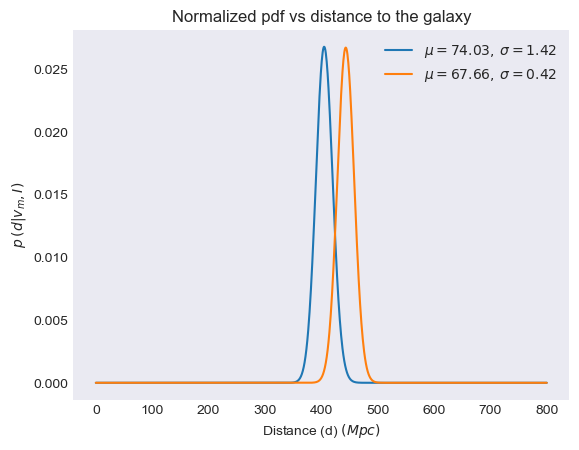

In [42]:
plt.plot(dlist, y1n, label = r"$\mu=74.03,\: \sigma=1.42$")
plt.plot(dlist, y2n, label = r"$\mu=67.66,\: \sigma=0.42$")
plt.xlabel(r"Distance (d) $(Mpc)$")
plt.ylabel(r"$p\:(d|v_m, I)$")
plt.title("Normalized pdf vs distance to the galaxy")
plt.legend()
plt.show()

### Gauss 1: $\mu=74.03,\: \sigma=1.42$

In [43]:
most_p(dlist,y1n)
left_l(dlist,y1n)
right_l(dlist,y1n)

Best estimate (dhat) in Mpc:  404.8
Index:  506
___________________

Left limit of Central 68 (in Mpc): 392.8
Index:  491
___________________

Right limit of Central 68 (in Mpc) 422.40000000000003
Index:  528
___________________



### Gauss 2: $\mu=67.66,\: \sigma=0.42$

In [44]:
most_p(dlist,y2n)
left_l(dlist,y2n)
right_l(dlist,y2n)

Best estimate (dhat) in Mpc:  443.20000000000005
Index:  554
___________________

Left limit of Central 68 (in Mpc): 430.40000000000003
Index:  538
___________________

Right limit of Central 68 (in Mpc) 460.0
Index:  575
___________________



#### We see that the central 68 percent intervals do not line up, meaning the meansurements do not agree with each other

- We also can see this from the plot easily

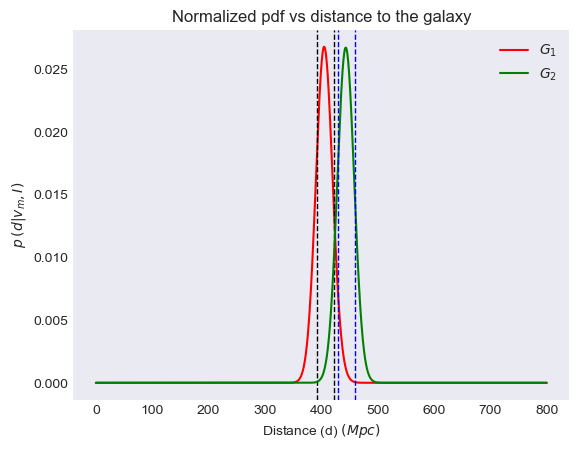

In [45]:
plt.plot(dlist, y1n, label = r"$G_1$", color="red") # \mu=74.03,\: \sigma=1.42

# plt.axvline(dlist[506], ymin = 0, ymax = 1, 
#             linewidth = 1, linestyle ="--", 
#             color ='black') 
plt.axvline(dlist[491], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='black') 
plt.axvline(dlist[528], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='black') 

plt.plot(dlist, y2n, label = r"$G_2$",color="green") # $\mu=67.66,\: \sigma=0.42$

# plt.axvline(dlist[554], ymin = 0, ymax = 1, 
#             linewidth = 1, linestyle ="--", 
#             color ='black') 
plt.axvline(dlist[538], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='blue') 
plt.axvline(dlist[575], ymin = 0, ymax = 1, 
            linewidth = 1, linestyle ="--", 
            color ='blue') 

plt.xlabel(r"Distance (d) $(Mpc)$")
plt.ylabel(r"$p\:(d|v_m, I)$")
plt.title("Normalized pdf vs distance to the galaxy")

plt.legend()
plt.show()

# Appendix

### I was trying to check if lin or uniform H list makes more sense for Jefferies Prior
- You can see the appendix for how it looked with Uniform list H 

### Uniform

In [46]:
Hlistj1 = np.random.uniform(50,90, size=1001)
dlistjeff = np.random.uniform(50,90, size=1001)
jeff = jeffboi(Hlistj1)
area = np.trapz(jeff, Hlistj1)
prob = jeff/area
x = np.random.choice(Hlistj1, size=1001, p = prob/sum(prob))

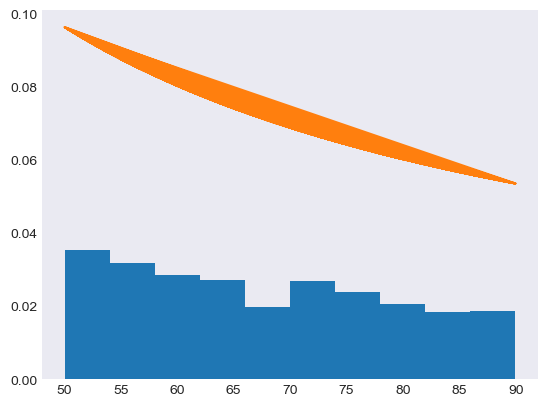

In [47]:
plt.hist(x, density=True)
plt.plot(Hlistj1, prob)
plt.show()

### Even though this plot looks wack; the end result is more or less the same as what I added above for 1(c), (d)